In [2]:
import os
import sys
from torchdiffeq import odeint as odeint

sys.path.append(os.path.abspath(".."))

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from mpl_toolkits import mplot3d
from numpy import linalg as la
from scipy import stats
from scipy import spatial as sp
from scipy import integrate as integ
import pandas as pd
import torch
import torch.nn as nn
from tqdm import tqdm
from ipywidgets import interact, IntSlider
import types

import models.Neural_ODEs_v2 as nodes
import models.DynamicalSystems as ds

In [3]:
model = torch.load('/Users/jackr/Documents/GitHub/JackRoss-PhD-Notes/NODE_with_bifurcation_parameter/lorenz_bif_neural_ODE_v1.pt', weights_only=False)

In [6]:
x0 = torch.tensor([[1, 1, 1], [-1, -1, 1]])
rho_values = torch.arange(1, 30, 0.1)

x0_reshaped = x0.repeat(rho_values.shape[0], 1)

rho_values_reshaped = rho_values.repeat(x0.shape[0]).unsqueeze(1)

init = torch.cat([x0_reshaped, rho_values_reshaped], dim=1)

# By Max Points 

In [7]:
init.shape

torch.Size([580, 4])

In [ ]:
dt = 0.01
t_max = 100.0
transient = 50.0
max_points_per_rho = 80

sol = odeint(model, init, torch.arange(0, t_max + dt, dt))

sol = sol[int(transient/dt):]

In [9]:
def z_maxima(z):
# Identify local maxima in z is_z_max = (z[1:-1, 0] > z[:-2, 0]) & (z[1:-1, 0] > z[2:, 0]) return is_z_max
    return (z[1:-1] > z[:-2]) & (z[1:-1] > z[2:])

In [14]:
z= sol[:, :, 2].detach().numpy()
is_z_max = z_maxima(z)
 # Extract z values at local maxima and corresponding rho values
is_z_max.shape

(4999, 580)

In [15]:
z_pts = []
x_pts = []
a= sol[1:-1]
a.shape

for i in range(init.shape[0]):
    x_pts.append(a[is_z_max[:, i], i, :])

In [18]:
pts = torch.concat(x_pts).detach().numpy()

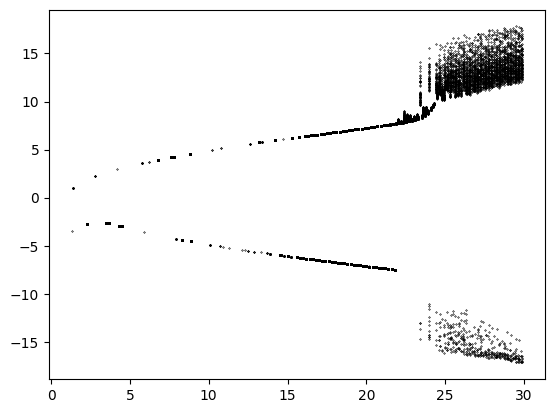

In [19]:
plt.plot(pts[:, 3], pts[:, 0], markersize=0.5, color='k', linestyle='', marker='.')

# By Plane Crossing

In [20]:
dt = 0.01
t_max = 250.0
transient = 200.0
max_points_per_rho = 80

sol = sol = odeint(model, init, torch.arange(0, t_max + dt, dt))

sol = sol[int(transient/dt):]

: 

sol = odeint(func=lorenz.na_f, y0=init, t=torch.arange(0, t_max, dt), method="dopri5",
    rtol=1e-6,
    atol=1e-9)[int(transient/dt):]

In [ ]:
z = sol[:, :, 2].cpu().numpy()
z_post = z

z_plane = (sol[0, :, 3] - 1).detach().cpu().numpy()

In [ ]:
a = z_post[:-1] - z_plane
b = z_post[1:] - z_plane
is_crossing = (a * b <= 0)

In [ ]:
z_pts = []
x_pts = []
a= sol[:-1]
a.shape

for i in range(init.shape[0]):
    x_pts.append(a[is_crossing[:, i], i, :])

In [ ]:
plot_data = torch.concat(x_pts)

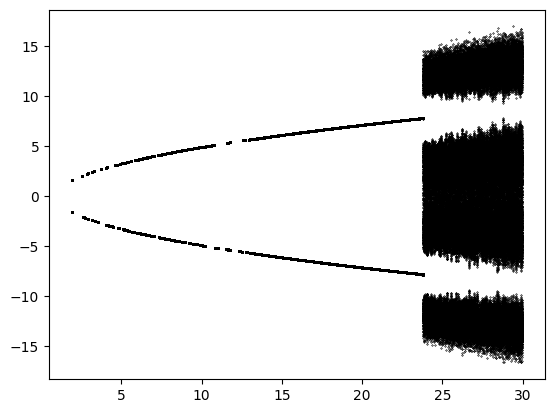

In [ ]:
plt.plot(plot_data[:, 3], plot_data[:, 0], markersize=0.5, color='k', linestyle='', marker='.')